In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

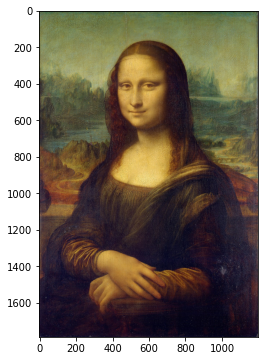

In [54]:
img = cv2.imread("/content/Mona Lisa.jpeg")

plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# **Problem 1** :-  Image Inversion


---

## **How it works** :- 
An inverted image is one in which all the colors from the original image are inverted.\
\
If, a single pixel value of original image = x.\
That pixel value of the Inverted image = (255-x).\
\
For example, a white colored ball in the original image will look black in the inverted image.\
\
We can do this by bitwise not operator from OpenCV.

## **Code & Output** :-    

In [55]:
imagem = cv2.bitwise_not(img)

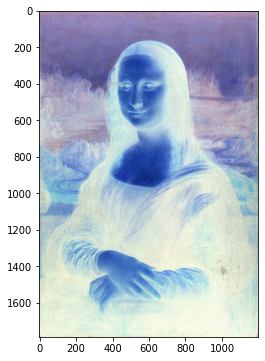

In [56]:
plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()

# **Problem 2** :-  Image Histogram


---

## **How it works** :- 
The histogram plots the number of pixels in the image (vertical axis) with a particular brightness or tonal value (horizontal axis).\
We will be using the cv2.calcHist function to build our histogram.

# *cv2.calcHist(images, channels, mask, histSize, ranges)*

# *images*: 
This is the image that we want to compute a histogram for. Wrap it as a list: [myImage] .
# *channels*: 
A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].
# *mask*: 
Here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.
# *histSize*: 
This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].
# *ranges*: 
The range of possible pixel values. Normally, this is [0, 256] (that is not a typo — the ending range of the cv2.calcHist function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

## **Code & Output** :-   

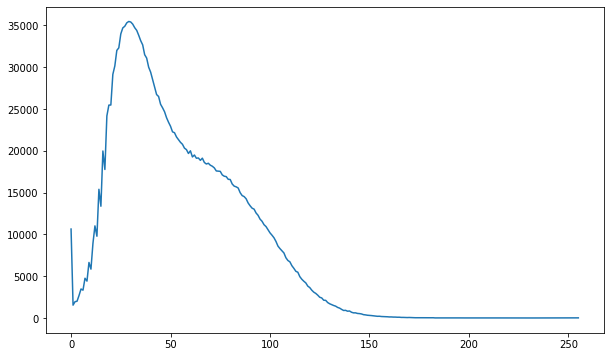

In [57]:
histr = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(10, 6))
plt.plot(histr)
plt.show()

# **Problem 3** :-  Threshold using python

---

## **How it works** :- 
For every pixel, the same threshold value is applied.\
\
If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.\
\
The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. All simple thresholding types are shown below:

## **Code & Output** :-   

In [58]:
## Binary Thresholding
ret, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

## Binary Inverse Thresholding
ret, img_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

## Threshold to zero
ret, img_threshtozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

## Threshold to zero inverse
ret, img_threshtozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

## Threshold truncation
ret, img_thresh_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

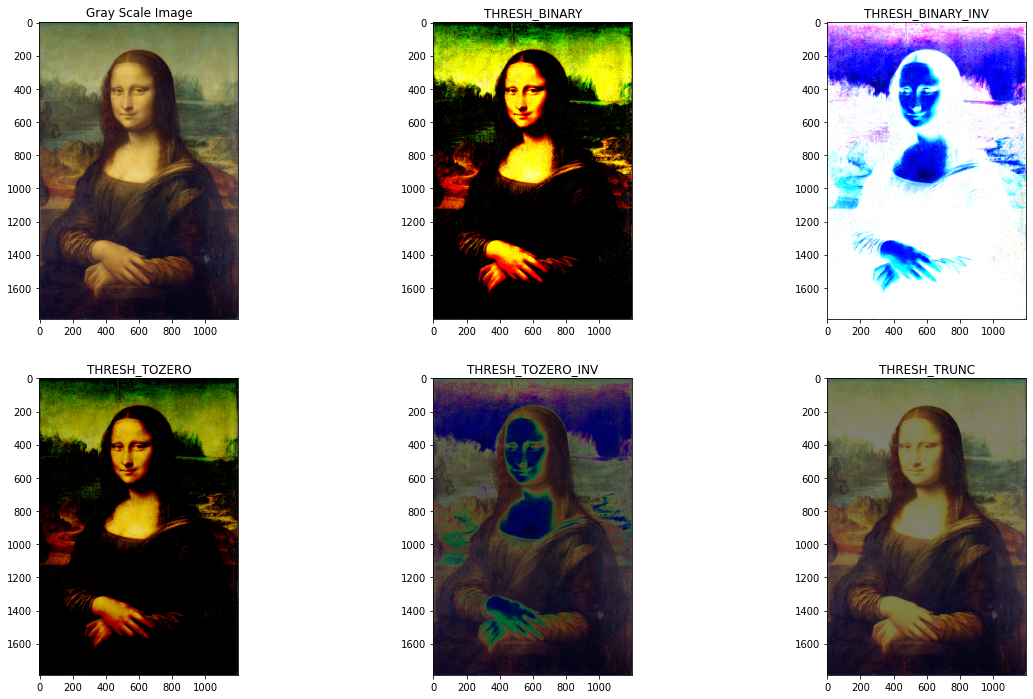

In [59]:
# Plot the images

plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gray Scale Image")

plt.subplot(2, 3, 2)
plt.imshow (cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.title("THRESH_BINARY")

plt.subplot(2, 3, 3)
plt.imshow (cv2.cvtColor(img_binary_inv, cv2.COLOR_BGR2RGB))
plt.title("THRESH_BINARY_INV")

plt.subplot(2, 3, 4)
plt.imshow (cv2.cvtColor(img_threshtozero, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TOZERO")

plt.subplot(2, 3, 5)
plt.imshow (cv2.cvtColor(img_threshtozero_inv, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TOZERO_INV")

plt.subplot(2, 3, 6)
plt.imshow (cv2.cvtColor(img_thresh_trunc, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TRUNC")

plt.show()

# **Problem 4** :-  Bit Plane Slicing

---

## **How it works** :- 
For an 8-bit image, a pixel value of 0 is represented as 00000000 in binary form and 255 is encoded as 11111111. Here, the leftmost bit is known as the most significant bit (MSB) as it contributes the maximum. e.g. if MSB of 11111111 is changed to 0 (i.e. 01111111), then the value changes from 255 to 127. Similarly, rightmost bit is known as Least significant bit (LSB).\
\
In Bit-plane slicing, we divide the image into bit planes. This is done by first converting the pixel values in the binary form and then dividing it into bit planes. \
\
For a 3×3, 3-bit image as shown below, We know that the pixel values for 3-bit can take values between 0 to 7.\
\
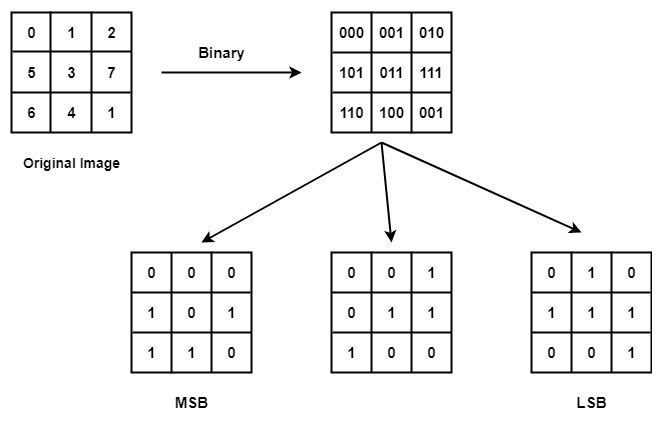

## **Code & Output** :-   

In [62]:
img = cv2.imread('/content/Mona Lisa.jpeg',0)

In [63]:
psnr=10*np.log10((255*255)/(1/(225*225)*np.sum(img)*np.sum(img)))
print('PSNR is: ',psnr)

PSNR is:  -68.89971543239817


In [66]:
def cov_binary(num):
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)        
    return binary_num
def conv_decimal(listt):
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x
def discriminate_bit(bit,img):
    z = np.zeros([800,800])
    for i in range(800):
        for j in range(800):
            x = cov_binary(img[i][j])
            for k in range(8):
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

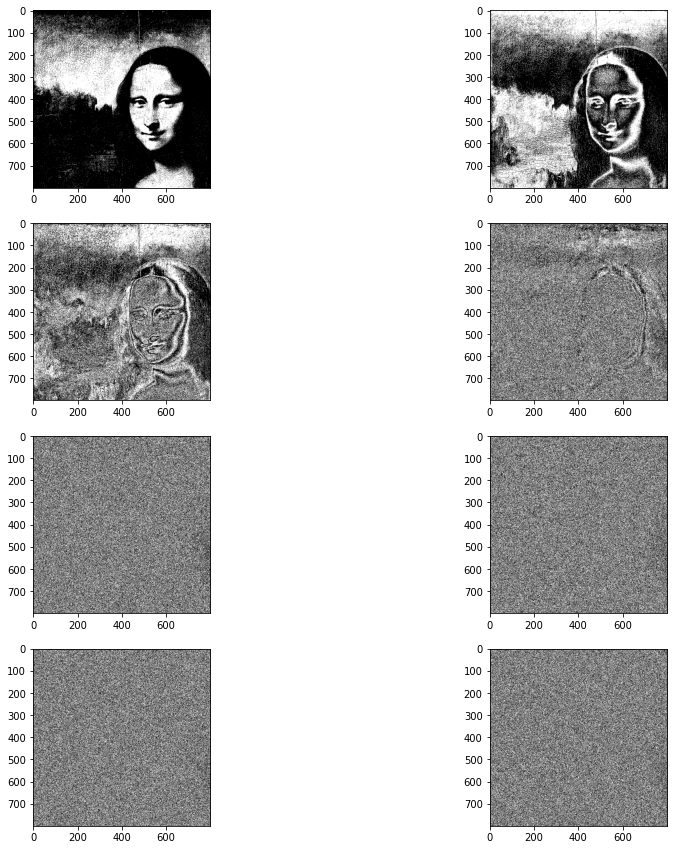

In [67]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,9):
    fig.add_subplot(4,2,i)
    plt.imshow(discriminate_bit(i-1,img), cmap='gray')


plt.show(block=True)

# **Problem 5** :-  Contrast Stretching

---

## **How it works** :- 
*Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by `stretching' the range of intensity values it contains to span a desired range of values, e.g. the the full range of pixel values that the image type concerned allows.*\
\
Before the stretching can be performed it is necessary to specify the upper and lower pixel value limits over which the image is to be normalized. Often these limits will just be the minimum and maximum pixel values that the image type concerned allows. For example for 8-bit graylevel images the lower and upper limits might be 0 and 255. Call the lower and the upper limits a and b respectively.

The simplest sort of normalization then scans the image to find the lowest and highest pixel values currently present in the image. Call these c and d. Then each pixel P is scaled using the following function:

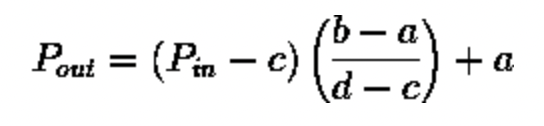
\
Values below 0 are set to 0 and values about 255 are set to 255.

The problem with this is that a single outlying pixel with either a very high or very low value can severely affect the value of c or d and this could lead to very unrepresentative scaling. Therefore a more robust approach is to first take a histogram of the image, and then select c and d at, say, the 5th and 95th percentile in the histogram (that is, 5% of the pixel in the histogram will have values lower than c, and 5% of the pixels will have values higher than d). This prevents outliers affecting the scaling so much.

Another common technique for dealing with outliers is to use the intensity histogram to find the most popular intensity level in an image (i.e. the histogram peak) and then define a cutoff fraction which is the minimum fraction of this peak magnitude below which data will be ignored. The intensity histogram is then scanned upward from 0 until the first intensity value with contents above the cutoff fraction. This defines c. Similarly, the intensity histogram is then scanned downward from 255 until the first intensity value with contents above the cutoff fraction. This defines d.

Some implementations also work with color images. In this case all the channels will be stretched using the same offset and scaling in order to preserve the correct color ratios.

## **Code & Output** :-   

In [70]:
# Method to process the red band of the image
def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


# Method to process the green band of the image
def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


# Method to process the blue band of the image
def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

In [72]:
# Create an image object

from PIL import Image
imageObject = Image.open("/content/Mona Lisa.jpeg")

In [73]:
# Split the red, green and blue bands from the Image

multiBands = imageObject.split()

In [74]:
# Apply point operations that does contrast stretching on each color band

normalizedRedBand      = multiBands[0].point(normalizeRed)
normalizedGreenBand    = multiBands[1].point(normalizeGreen)
normalizedBlueBand     = multiBands[2].point(normalizeBlue)

In [75]:
# Create a new image from the contrast stretched red, green and blue brands

normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

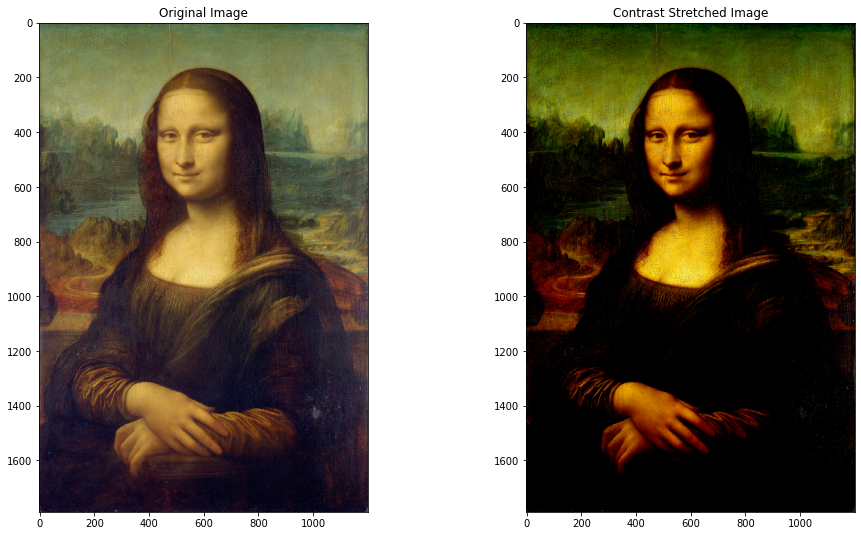

In [76]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.imshow (imageObject)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow (normalizedImage)
plt.title("Contrast Stretched Image")

plt.show()

# **Problem 6** :-  Edge Detection

---

## **How it works** :- 
*Edge detection is a technique of image processing used to identify points in a digital image with discontinuities, simply to say, sharp changes in the image brightness. These points where the image brightness varies sharply are called the edges (or boundaries) of the image.*\
\
It is one of the basic steps in image processing, pattern recognition in images and computer vision. When we process very high-resolution digital images, convolution techniques come to our rescue. Let us understand the convolution operation (represented in the below image using *) using an example-
\
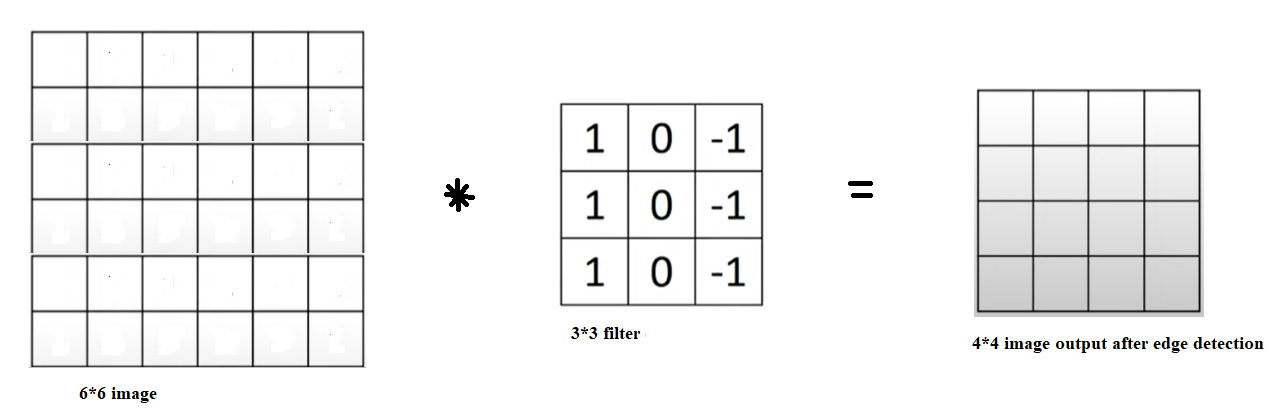
\
For this example, we are using 3*3 Prewitt filter as shown in the above image. As shown below, when we apply the filter to perform edge detection on the given 6*6 image (we have highlighted it in purple for our understanding) the output image will contain ((a11*1)  + (a12*0) + (a13*(-1))+(a21*1)+(a22*0)+(a23*(-1))+(a31*1)+(a32*0)+(a33*(-1))) in the purple square.  We repeat the convolutions horizontally and then vertically to obtain the output image.\
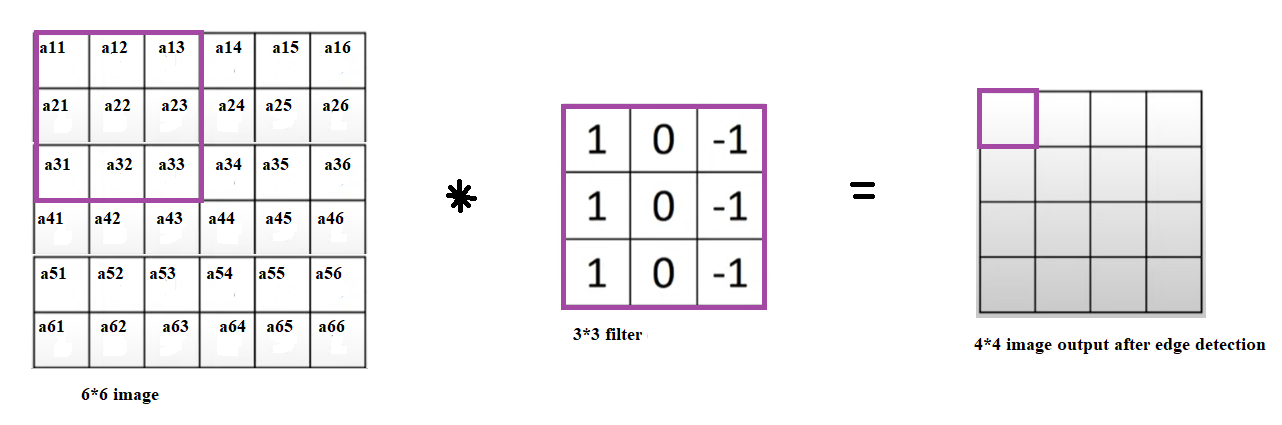
\
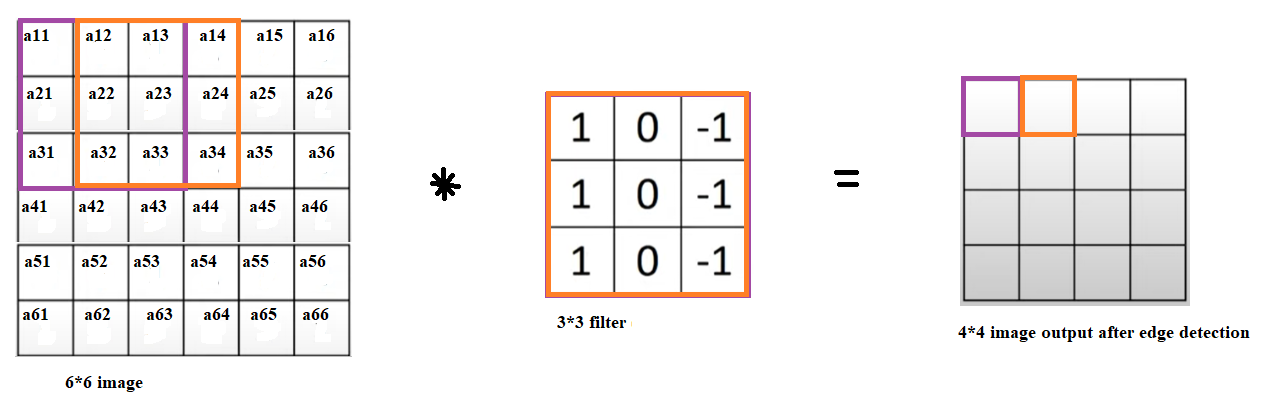
\
We would continue the above procedure to get the processed image after edge-detection. But, in the real world, we deal with very high-resolution images for Artificial Intelligence applications. Hence we opt for an algorithm to perform the convolutions, and even use Deep Learning to decide on the best values of the filter. \
\
There are various methods in edge detection. Some edge detection methods are shown below: 

## **Code & Output** :-   

In [87]:
img = cv2.imread("/content/Mona Lisa.jpeg")

In [88]:
# Convert to graycsale

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [89]:
# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

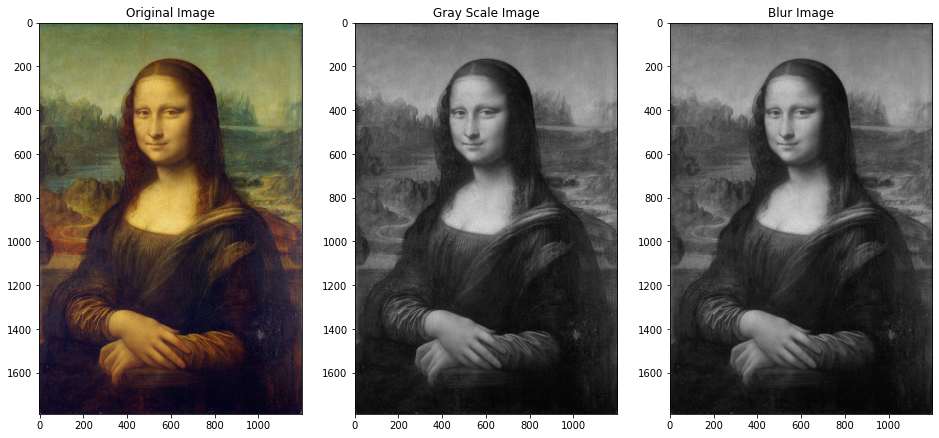

In [90]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow (cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title("Gray Scale Image")

plt.subplot(1, 3, 3)
plt.imshow (cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.title("Blur Image")

plt.show()

In [91]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

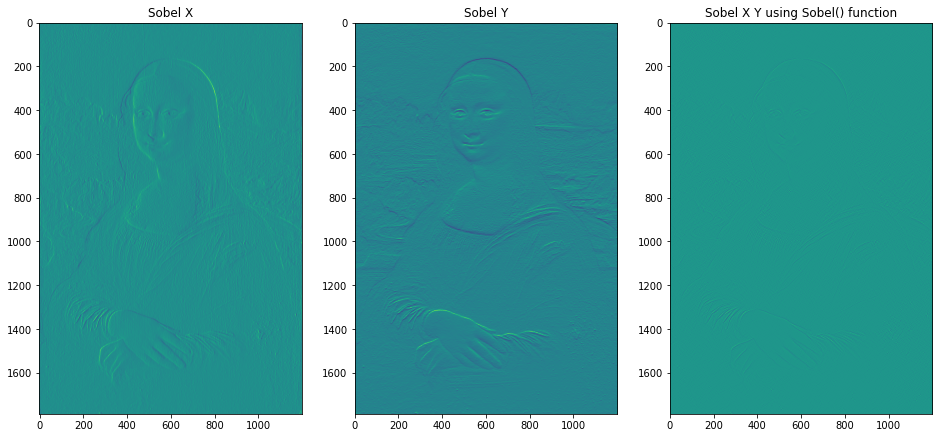

In [99]:
# Display Sobel Edge Detection Images

plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
plt.imshow (sobelx)
plt.title("Sobel X")

plt.subplot(1, 3, 2)
plt.imshow (sobely)
plt.title("Sobel Y")

plt.subplot(1, 3, 3)
plt.imshow (sobelxy)
plt.title("Sobel X Y using Sobel() function")

plt.show()

In [84]:
# Canny Edge Detection

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

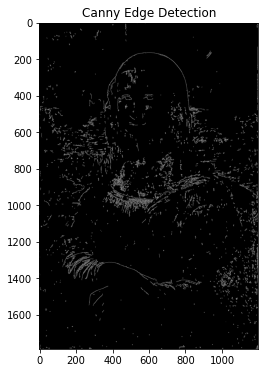

In [85]:
# Display Canny Edge Detection Image

plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.show()